#Introduction

The Boston Housing dataset is a classic dataset widely used in statistics and machine learning to study the relationship between housing prices and various socio-economic and environmental factors. It contains information on 506 census tracts of Boston, with variables describing demographics, air quality, accessibility, and housing characteristics.

The main objective of this project is to analyze the factors that influence the median value of owner-occupied homes (MEDV) using exploratory data analysis (EDA) and statistical hypothesis testing.

##Goals of the Analysis

Perform EDA with plots (boxplots, scatter plots, histograms) to explore variable distributions.

Test hypotheses about house prices in relation to:

Proximity to the Charles River (CHAS)

Age of houses (AGE groups)

Industrial activity (INDUS) and pollution (NOX)

Pupil–teacher ratio (PTRATIO)

Distance to employment centers (DIS)

Apply statistical methods such as:

T-test for independent samples

ANOVA for multiple group comparisons

Pearson correlation for relationships between variables

Regression analysis for modeling impacts

##Expected Outcome

Through this analysis, we aim to:

Identify significant factors affecting house prices.

Understand the relationships between environmental, demographic, and educational factors and housing values.

Provide insights into how location and socio-economic variables shape real estate markets.

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm

In [11]:
# URL for the dataset
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Read directly into a DataFrame
boston_df = pd.read_csv(URL)

# Show first few rows
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Data Overview

In [12]:
boston_df.info()
boston_df.describe()
boston_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Boxplot of Median Value of Owner-Occupied Homes (MEDV)

Text(0, 0.5, 'MEDV')

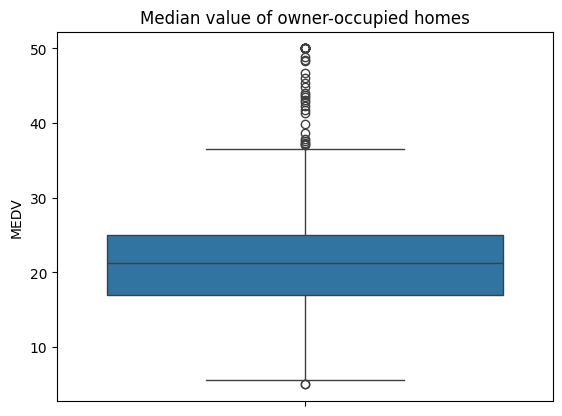

In [13]:
sns.boxplot(y='MEDV',data=boston_df)
plt.title("Median value of owner-occupied homes")
plt.ylabel('MEDV')

The boxplot shows the distribution of the median value of owner-occupied homes (MEDV).  
Most house values lie between **15 and 25 (in $1000s)**.  
There are several outliers above 50, which is due to the dataset being **capped at 50**.  
This indicates the distribution is **right-skewed**, with many homes clustered in the mid-range and fewer very expensive homes.


# Frequency of Tracts Bounded by the Charles River (CHAS)

Text(0, 0.5, 'CHAS')

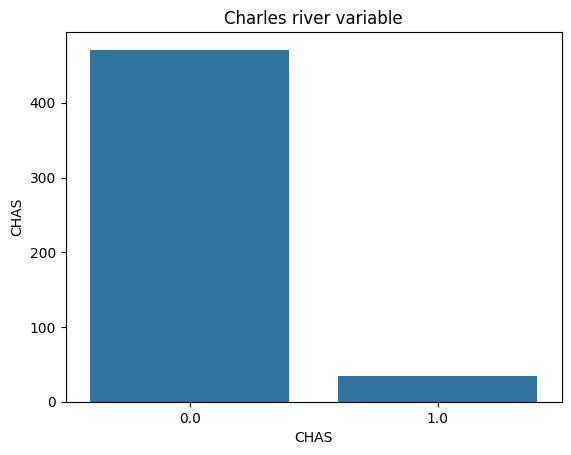

In [14]:
sns.countplot(x='CHAS',data=boston_df)
plt.title("Charles river variable")
plt.ylabel('CHAS')

The bar plot shows the distribution of the Charles River dummy variable (CHAS).  
Most tracts (CHAS = 0) are **not bounded by the Charles River**, while only a small number (CHAS = 1) are **bounded by the river**.  
This indicates an **imbalance in the dataset**, with far fewer river-bound tracts.  
When analyzing house prices, this imbalance should be kept in mind, since the river-bounded category has a much smaller sample size.


# Boxplot of Median House Value (MEDV) by Age Groups


<Axes: xlabel='age_group', ylabel='MEDV'>

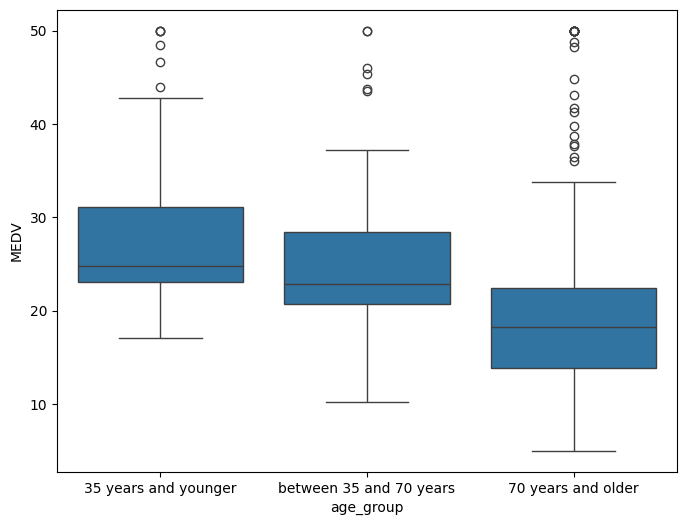

In [15]:
bins = [0,35,69,np.inf]
labels = ['35 years and younger','between 35 and 70 years','70 years and older']

boston_df['age_group'] = pd.cut(boston_df['AGE'],bins=bins,labels=labels)

plt.figure(figsize=(8,6))
sns.boxplot(data=boston_df,y='MEDV',x='age_group')

The boxplot compares the distribution of house values (MEDV) across three age groups of houses:  
- **35 years and younger**  
- **Between 35 and 70 years**  
- **70 years and older**  

The results show that houses in the **oldest age group (70+ years)** generally have lower median values compared to newer houses.  
Homes that are **35 years and younger** tend to have slightly higher values, with fewer extremely low-value outliers.  
This suggests that **newer properties are typically more valuable**, while older houses depreciate in price.


# Scatter Plot of Nitric Oxide Concentration (NOX) vs Proportion of Non-Retail Business Acres (INDUS)

<Axes: xlabel='INDUS', ylabel='NOX'>

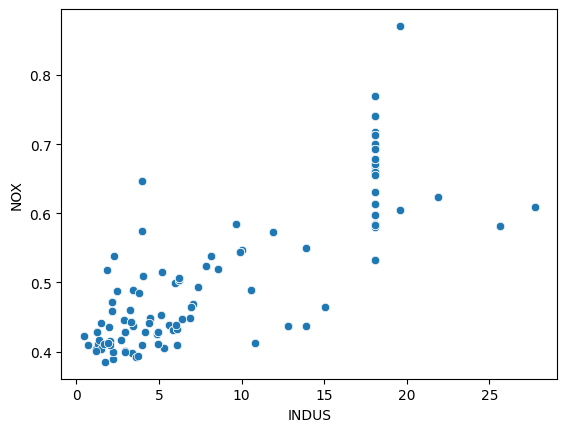

In [16]:
sns.scatterplot(x='INDUS',y='NOX',data=boston_df)

The scatter plot shows the relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).  
There is a **clear positive trend**: as the proportion of non-retail business acres increases, nitric oxide concentration also increases.  

This suggests that **areas with more industrial land use tend to have higher levels of air pollution (NOX)**.  
However, the points also show some spread, meaning while the general relationship is positive, it is not perfectly linear.


# Histogram of Pupil–Teacher Ratio (PTRATIO)

<Axes: xlabel='PTRATIO', ylabel='Count'>

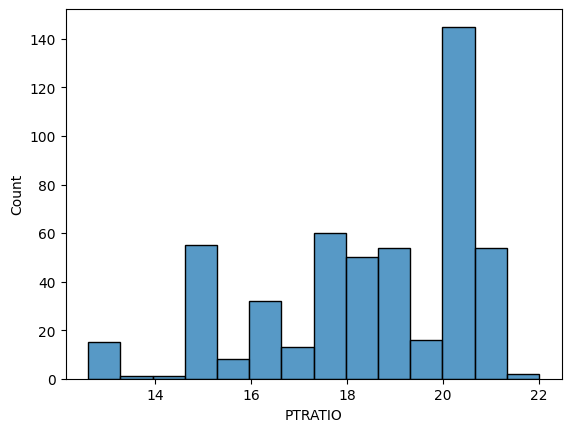

In [17]:
sns.histplot(x='PTRATIO',data=boston_df)

The histogram shows the distribution of the pupil–teacher ratio (PTRATIO) across Boston towns.  
Most towns have ratios between **18 and 22 students per teacher**, with a clear spike around **20**.  
A few towns have much lower ratios (~12–15), but these are relatively uncommon.  

This indicates that the majority of schools operate with class sizes of about 20 students per teacher,
suggesting that extreme values (very low or very high ratios) are rare.


# Is there a significant difference in median house values (MEDV) between tracts bounded by the Charles River (CHAS=1) and those that are not (CHAS=0)?


# Normality Test
We first check whether MEDV is approximately normally distributed


<Axes: xlabel='MEDV', ylabel='Count'>

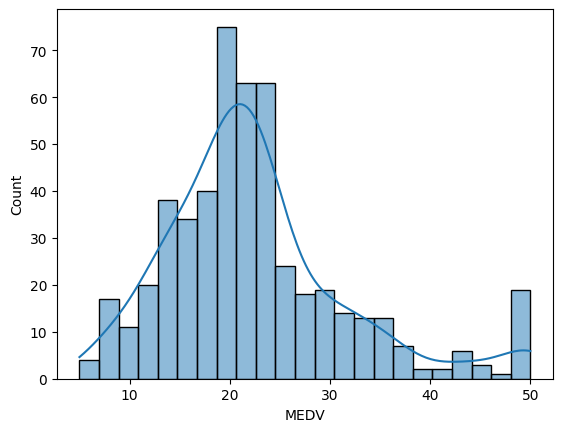

In [18]:
sns.histplot(x='MEDV',data=boston_df,kde=True)

The histogram with KDE line shows that **MEDV is slightly right-skewed** with many values clustered between 15 and 25 and several outliers near the capped maximum of 50.  
Although the distribution is not perfectly normal, the t-test is considered robust enough to handle this mild deviation from normality.


### Homogeneity of Variance (Levene’s Test)
We next test the assumption of equal variances between the two groups (CHAS=0 and CHAS=1).  

- **H₀:** The variances of the two groups are equal.  
- **H₁:** The variances of the two groups are not equal.  




In [19]:
stat,p = levene(boston_df[boston_df['CHAS']==0.0]['MEDV'],boston_df[boston_df['CHAS']==1.0]['MEDV'],center='mean')
p


np.float64(0.003238119367639829)

The Levene’s test returned a **p-value < 0.05**, so we **reject H₀**.  
This indicates that the variances are not equal between the two groups, and therefore we should use **Welch’s t-test** (i.e., `equal_var=False`) for more reliable results.


### Independent Samples T-test

- **H₀ (Null):** There is no significant difference in the median value of houses (MEDV) between tracts bounded by the Charles River (CHAS=1) and those that are not (CHAS=0).  
- **H₁ (Alternative):** There is a significant difference in the median value of houses (MEDV) between tracts bounded by the Charles River and those that are not.


In [20]:
stat,p = ttest_ind(boston_df[boston_df['CHAS']==0.0]['MEDV'],boston_df[boston_df['CHAS']==1.0]['MEDV'],equal_var=False)
p


np.float64(0.0035671700981375174)

The t-test returned a p-value of approximately **0.0036**, which is below the significance level of 0.05.  
Therefore, we **reject the null hypothesis** and conclude that there is a **significant difference in house prices (MEDV)** between tracts bounded by the Charles River and those that are not.


## Is there a significant difference in median house values (MEDV) across different age groups of houses?


### Homogeneity of Variance (Levene’s Test)

- **H₀:** Variances of MEDV across the three age groups are equal.  
- **H₁:** Variances of MEDV across the three age groups are not equal.  






In [21]:
stat,p= levene(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],
                boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                boston_df[boston_df['age_group']=='70 years and older']['MEDV'],center='mean')
p


np.float64(0.1097570790573611)

The Levene’s test returned **p = 0.109 > 0.05**, so we **fail to reject H₀**.  
This means the assumption of equal variances is satisfied, and it is appropriate to proceed with ANOVA.


### One-way ANOVA

- **H₀:** There is no difference in median house values (MEDV) across the three age groups.  
- **H₁:** At least one age group has a significantly different median house value (MEDV).  




In [22]:
stat,p= f_oneway(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],
                boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                boston_df[boston_df['age_group']=='70 years and older']['MEDV'],equal_var=True)
p


np.float64(1.1519902599965118e-15)

The ANOVA test returned **p ≈ 1.15e-15 < 0.05**, so we **reject H₀**.  
This provides strong evidence that **median house values differ significantly across the three age groups**.

## Is there a relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)?


- **H₀ (Null):** There is no correlation between NOX and INDUS.  
- **H₁ (Alternative):** There is a correlation between NOX and INDUS.  


<Axes: xlabel='NOX', ylabel='INDUS'>

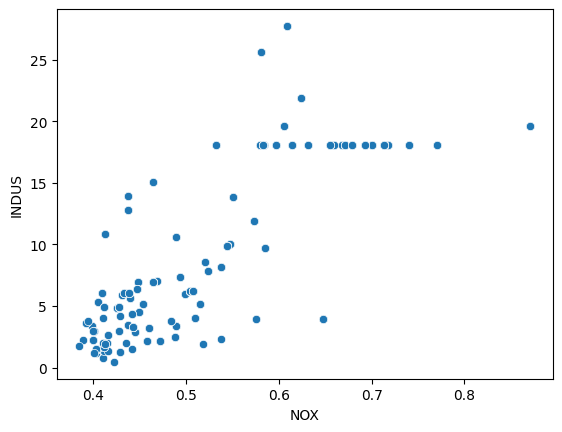

In [23]:
sns.scatterplot(data=boston_df, x='NOX',y='INDUS')

In [24]:
corr, p = pearsonr(boston_df['NOX'],boston_df['INDUS'])
p



np.float64(7.913361061239639e-98)

Since the p-value is far below 0.05, we reject the null hypothesis (H₀). The results show a **strong positive correlation** between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).  

This means that **as the proportion of industrial land increases, air pollution (NOX) also increases**.  
The strength of the correlation (r ≈ 0.76) suggests a substantial relationship, although it is not perfectly linear.


# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?



- **H₀ (Null):** Distance to employment centers (DIS) has no significant impact on median house values (MEDV).  
- **H₁ (Alternative):** Distance to employment centers (DIS) has a significant impact on median house values (MEDV).  


In [25]:
X= boston_df['DIS']
Y= boston_df['MEDV']

X= sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predict = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        19:44:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression analysis produced the following results:

- Coefficient for DIS = **1.0916** (p < 0.001)  
- R² = **0.062**  

Since the p-value is below 0.05, we reject the null hypothesis (H₀).  
This indicates that distance to employment centers has a **significant positive effect** on house values.


##Conclusion

In this project, we analyzed the Boston Housing dataset to explore the relationship between housing prices (MEDV) and various socio-economic, environmental, and accessibility factors. Using statistical tests and visualizations, we examined several key questions:

Charles River (CHAS):
T-test results showed that houses bounded by the Charles River have significantly higher values than those that are not.

Age of Houses (AGE):
ANOVA results indicated that newer houses tend to have higher median values, while houses over 70 years old are generally less valuable.

Industrial Land Use (INDUS) and Pollution (NOX):
Pearson correlation revealed a strong positive correlation (r ≈ 0.76), showing that higher industrial activity is associated with higher nitric oxide concentrations.

Pupil–Teacher Ratio (PTRATIO):
Histogram analysis showed that most towns cluster around a ratio of 18–22 students per teacher, with few extremes.

Distance to Employment Centers (DIS):
Regression analysis found that greater distance is associated with slightly higher house values, but the explanatory power was low (R² ≈ 0.06), meaning other factors strongly influence prices.

In [43]:
!git config --global user.email "anannafaiza102@gmail.com"
!git config --global user.name "Fahmida10"


In [50]:
!ls /content


boston-housing-statistical-analysis  sample_data
